### Pull Data from Reddit subreddit NYCapartments using Reddit API 

In [94]:
# imports
import json
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import praw
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
# open credential file
with open('client_secrets.json', 'r') as f:
    app_creds = json.load(f)


In [4]:
# get app credentials
client_id = app_creds['client_id']
client_secret = app_creds['client_secret']
user_agent = app_creds['user_agent']
redirect_uri = app_creds['redirect_uri']
client_password = app_creds['password']
user_name = app_creds['user_name']

### Connect to Reddit API

In [5]:
# connect to Reddit API using PRAW
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    password=client_password,
    user_agent=user_agent,
    username=user_name,
)

print(reddit.read_only)

False


In [10]:
# add in astoriaapartments later
subreddit_topics = ['astoriaapartments', 'NYCapartments']

In [116]:
def pull_post_data(subrreddit:str)->pd.DataFrame:
    '''
    Parameters
    ----------
    subrreddit: str
        string with subreddit to scrape
    
    Returns
    -------
    result_df: pd.DataFrame
        DataFrame with the folllowing columns: 
        ['subreddit', 'title', 'score', 'num_comments', 'url', 'comments']
    '''
    # Pull posts from last year NYCapartments subreddit
    start_time = time.time()
    post_list = []
    for post in subrreddit:
        post_dict = {}
        post_comments = []
        post_dict['subreddit'] = post.subreddit_name_prefixed
        post_dict['title'] = post.title
        post_dict['score'] = post.score
        post_dict['num_comments'] = post.num_comments
        post_dict['url'] = post.shortlink
        post.comments.replace_more(limit=None)
        for top_level_comment in post.comments:
            post_comments.append(top_level_comment.body)
        post_dict['comments'] = post_comments
        post_list.append(post_dict)

    end_time = time.time()
    total_time = round(((end_time - start_time)/60.0),2)
    print(f"Finished pulling data in {total_time} mins")

    result_df = pd.DataFrame(post_list)
    return result_df

In [118]:
sub_reddit = reddit.subreddit("NYCapartments").top(time_filter="year", limit=200)

In [119]:
data = pull_post_data(subrreddit=sub_reddit)

Finished pulling data in 4.53 mins


In [120]:
data.head()

,subreddit,title,score,num_comments,url,comments
0,r/NYCapartments,Midtown manhattan Studio with great view,1623,289,https://redd.it/1ditjh8,"[$5000 for a studio 😕, It comes with personal ..."
1,r/NYCapartments,"Spacious studio on the UWS, great location ste...",1437,57,https://redd.it/1at9s69,"[When can I move in?, Wow! What a steal!, Pets..."
2,r/NYCapartments,Those with high rise skyline apartments do you...,1336,249,https://redd.it/1fwnevs,[I didn’t live in one but I worked at an offic...
3,r/NYCapartments,The rent crisis in NYC is becoming increasingl...,1253,371,https://redd.it/1aq7si7,"[Two incomes no kids., Tell me about it, I lit..."
4,r/NYCapartments,Happy Monday everyone,947,199,https://redd.it/1auv5ws,[I think average salary context is needed. Tak...


In [111]:
data.comments

0     Agreed on LES. Older buildings plus some parts...
1     In terms of best balance between economics and...
2     Areas farthest from public transportation are ...
3     Lol never seen affordable in the same sentence...
4                             Two Bridges and Chinatown
5     FiDi considering it's legitimately desolate at...
6                                  Define affordable...
7     Murray Hill and Kips Bay are about the best yo...
8                                      Stuytown lottery
9                                             Chinatown
10                                        Staten Island
11    The 2nd Ave F train platform is quite lovely a...
12                           Baruch Houses.\n\nHoboken.
13                                           New Jersey
14    What rage of rents are we talking about here w...
15    So yes, old school definition of downtown is b...
16    traditional downtown is basically just Chinato...
17    in downtown manattan? across the bridges i

In [121]:
data.shape

(200, 6)

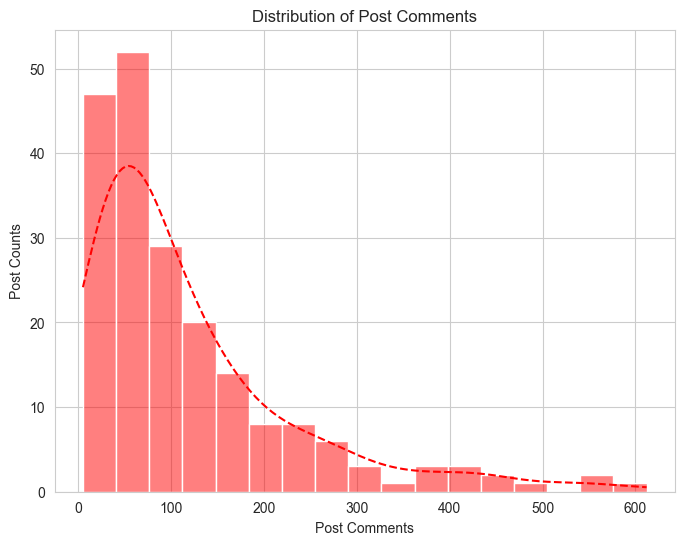

In [122]:
# Plot distribution of post comments
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='num_comments', kde=True, ax=ax, color='red', line_kws={'linestyle':'--'})
_ = ax.set_xlabel('Post Comments')
_ = ax.set_ylabel('Post Counts')
_ = ax.set_title('Distribution of Post Comments')

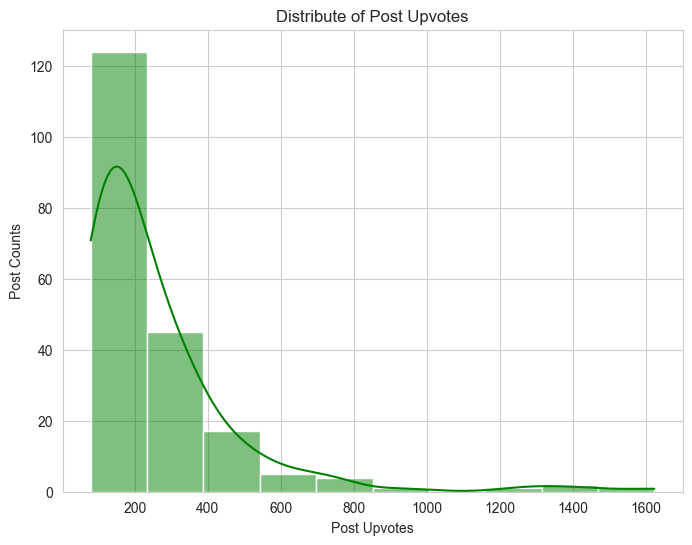

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x='score', kde=True, ax=ax, color='green', bins=10)
_ = ax.set_xlabel('Post Upvotes')
_ = ax.set_ylabel('Post Counts')
_ = ax.set_title('Distribute of Post Upvotes')

In [48]:
# write to csv
data.to_csv('./data/reddit_posts_nyc_apt.csv')

In [49]:
# # write to text file
# with open('./data/reddit_posts_nyc_apt.txt', 'w') as out_file:
#     for item in post_list:
#         out_file.write(f"{item}\n")


In [132]:
data.head()

,subreddit,title,score,num_comments,url,comments
0,r/NYCapartments,Midtown manhattan Studio with great view,1623,289,https://redd.it/1ditjh8,"[$5000 for a studio 😕, It comes with personal ..."
1,r/NYCapartments,"Spacious studio on the UWS, great location ste...",1437,57,https://redd.it/1at9s69,"[When can I move in?, Wow! What a steal!, Pets..."
2,r/NYCapartments,Those with high rise skyline apartments do you...,1336,249,https://redd.it/1fwnevs,[I didn’t live in one but I worked at an offic...
3,r/NYCapartments,The rent crisis in NYC is becoming increasingl...,1253,371,https://redd.it/1aq7si7,"[Two incomes no kids., Tell me about it, I lit..."
4,r/NYCapartments,Happy Monday everyone,947,199,https://redd.it/1auv5ws,[I think average salary context is needed. Tak...


In [135]:
# assign engagement - num comments and upvotes (score)
data = data.assign(engagement = data.score + data.num_comments)

In [137]:
# look at engagements - top 5
data.sort_values(by = 'engagement', ascending=False)[:5]

,subreddit,title,score,num_comments,url,comments,engagement
0,r/NYCapartments,Midtown manhattan Studio with great view,1623,289,https://redd.it/1ditjh8,"[$5000 for a studio 😕, It comes with personal ...",1912
3,r/NYCapartments,The rent crisis in NYC is becoming increasingl...,1253,371,https://redd.it/1aq7si7,"[Two incomes no kids., Tell me about it, I lit...",1624
2,r/NYCapartments,Those with high rise skyline apartments do you...,1336,249,https://redd.it/1fwnevs,[I didn’t live in one but I worked at an offic...,1585
1,r/NYCapartments,"Spacious studio on the UWS, great location ste...",1437,57,https://redd.it/1at9s69,"[When can I move in?, Wow! What a steal!, Pets...",1494
8,r/NYCapartments,Would I be stupid to leave a $860 rent stabili...,697,544,https://redd.it/1but5uy,[Everyone is different so make the best choice...,1241


In [138]:
# Get the top 5 posts based on this new engagement metric
top_engaged_posts = data.nlargest(5, 'engagement')

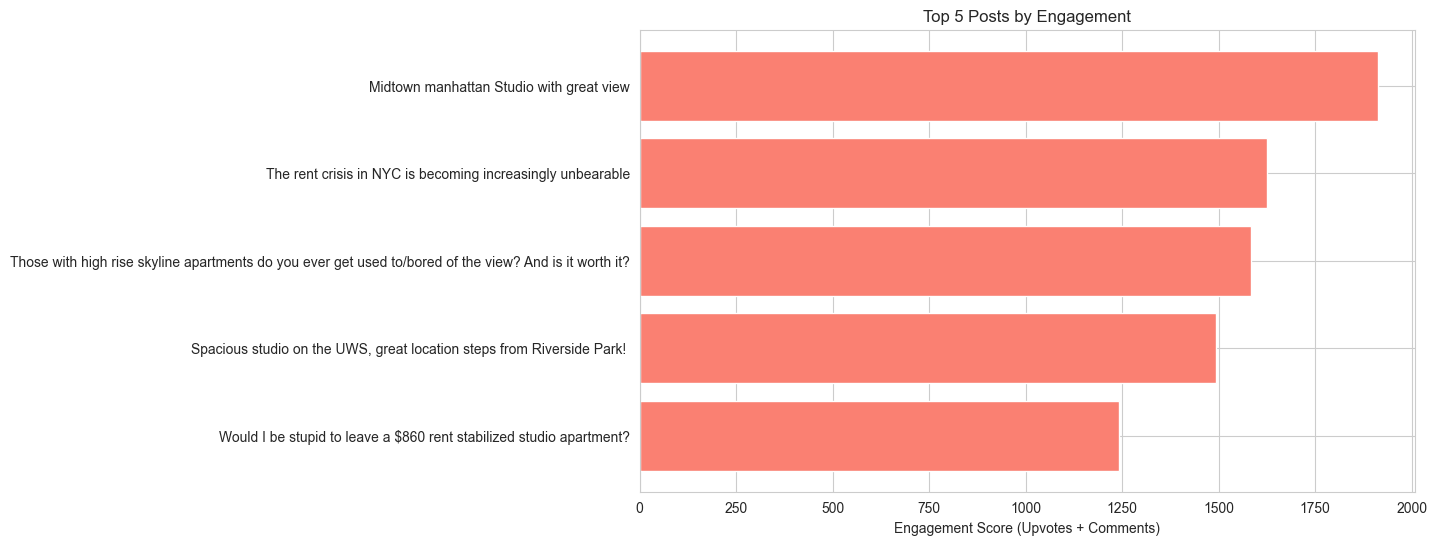

In [139]:
# plot engagements
plt.figure(figsize=(10, 6))
plt.barh(top_engaged_posts['title'], top_engaged_posts['engagement'], color='salmon')
plt.xlabel('Engagement Score (Upvotes + Comments)')
plt.title('Top 5 Posts by Engagement')
plt.gca().invert_yaxis()
plt.show()


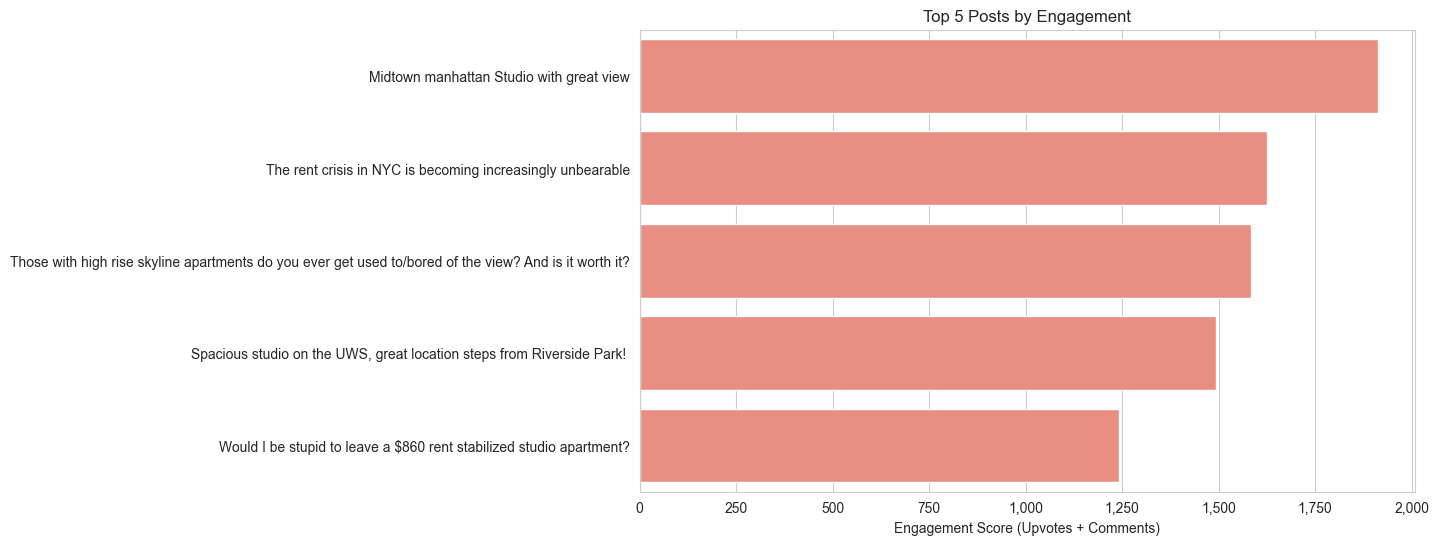

In [143]:
# Create the bar chart with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='engagement', y='title', data=top_engaged_posts, color='salmon')

# Set the x-axis label
_ = plt.xlabel('Engagement Score (Upvotes + Comments)')

# Format the x-axis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the title
_ = plt.title('Top 5 Posts by Engagement')
_ = ax.set_ylabel('')